# Shool of Analytics 2023. A/B Test

## Цель эксперимента
### Цель эксперимента - провести A/B тестирование и понять, есть ли разница между моделями расчета «Средняя Ставка» и «Максимальная Ставка».

## Нулевая и альтернативная гипотезы
### $H_0$ = {Количество перешедших по ссылке не изменится при изменении модели расчета не изменится}
### $H_1$ = {Количество перешедших по ссылке изменится при изменении модели расчета не изменится}

## Определение изменения и целевые метрики
### **CTR(click-through rate)** - это метрика показывает конверсию рекламы, то есть отношение числа кликов к числу показов.

$$ CTR = \frac{Total~Clicks~on~Website}{Total~Impressions~Count} \cdot 100 $$

### **CPC (cost per click)** - это метрика показывает сколько стоит один клик по рекламе.

$$ CPC = \frac{Total~Advertising~Spend}{Total~Clicks~on~Website}$$

### **Reach** - это метрика показывает сколько всего людей посмотрело рекламу.

### **CR (сonversion rate)** - это метрика показывает конверсию страницы (какая часть пользователей, которые перешли по рекламе, потом купили товары).

$$ CR = \frac{Total~Purchases~Count}{Total~Clicks~on~Website} \cdot 100 $$

### **Impressions** - это метрика показывает сколько всего раз реклама была показана.

### **CAC** - это стоимость привлечения клиента.

$$ CAC = \frac{Total~Advertising~Spend}{Total~Clicks~on~Website} $$

### **ATC Rate** - это доля посетителей, добавившее товары в корзину к общему число перешедших на сайт.

$$ ATC = \frac{Total~Add~to~Cart~Actions}{Total~Clicks~on~Website} $$

### **CPO (cost per order)** - цена за заказ.

$$ CPO = \frac{Total~Advertising~Spend}{Total~Purchases~Count} $$


## Экспериментальная и контрольная группы
### Из генеральной совокупности были случайным образом отобраны 2 группы одинакового размера для проведения эксперимента.


## Уровень статистической значимости
### В качестве ошибки 1 - ого рода возьмем $\alpha = 0.05$.

In [186]:
alpha = 0.05

### Загрузка библиотек

In [187]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import statsmodels.api as sm

In [188]:
control_group = pd.read_csv('control_group.csv')
test_group = pd.read_csv('test_group.csv')

In [189]:
(control_group.shape, test_group.shape)

((30, 10), (30, 10))

In [190]:
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Посмотрим, как распределены признаки по времени.

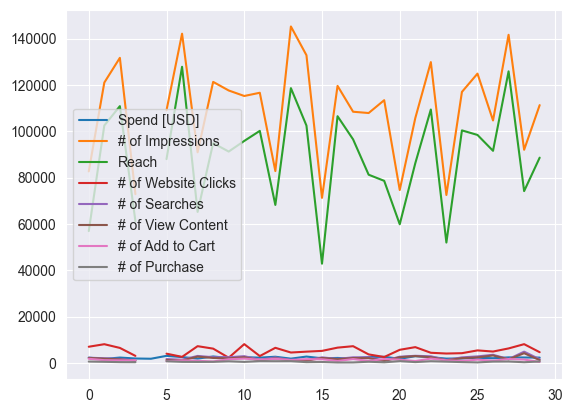

In [192]:
control_group[['Date',
               'Spend [USD]',
               '# of Impressions',
               'Reach',
               '# of Website Clicks',
               '# of Searches',
               '# of View Content',
               '# of Add to Cart',
               '# of Purchase'
               ]].plot();

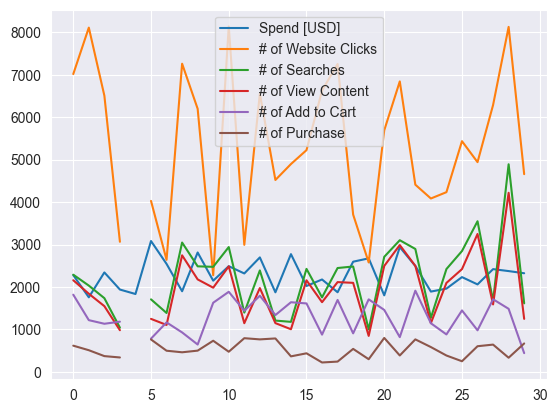

In [193]:
control_group[['Date',
               'Spend [USD]',
               '# of Website Clicks',
               '# of Searches',
               '# of View Content',
               '# of Add to Cart',
               '# of Purchase'
               ]].plot();

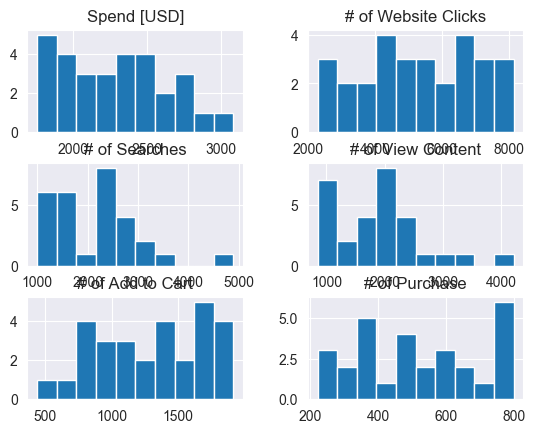

In [194]:
control_group[['Spend [USD]',
               '# of Website Clicks',
               '# of Searches',
               '# of View Content',
               '# of Add to Cart',
               '# of Purchase'
               ]].hist();

Так как в 5.08.2019 не было данных в таблице c control_group удалим запись за это число из обеих групп.

In [195]:
control_group = control_group.drop(labels=[4], axis=0)
test_group = test_group.drop(labels=[4], axis=0)

# Расчет метрик

In [263]:
# control_group
CTR_cg = control_group['# of Website Clicks'] * 100 / control_group['# of Impressions']
CTR_cg.name = 'CTR_cg'
CPC_cg = control_group['Spend [USD]'] / control_group['# of Website Clicks']
CPC_cg.name = 'CPC_cg'
Reach_cg = control_group['Reach']
Reach_cg.name = 'Reach_cg'
CR_cg = control_group['# of Purchase'] * 100 / control_group['# of Website Clicks']
CR_cg.name = 'CR_cg'
CAC_cg = control_group['Spend [USD]'] / control_group['# of Website Clicks']
CAC_cg.name = 'CAC_cg'
ATC_cg = control_group['# of Add to Cart'] / control_group['# of Website Clicks']
ATC_cg.name = 'ATC_cg'
CPO_cg = control_group['Spend [USD]'] / control_group['# of Purchase']
CPO_cg.name = 'CPO_cg'
# test_group
CTR_tg = test_group['# of Website Clicks'] * 100 / test_group['# of Impressions']
CTR_tg.name = 'CTR_tg'
CPC_tg = test_group['Spend [USD]'] / test_group['# of Website Clicks']
CPC_tg.name = 'CPC_tg'
Reach_tg = test_group['Reach']
Reach_tg.name = 'Reach_tg'
CR_tg = test_group['# of Purchase'] * 100 / test_group['# of Website Clicks']
CR_tg.name = 'CR_tg'
CAC_tg = test_group['Spend [USD]'] / test_group['# of Website Clicks']
CAC_tg.name = 'CAC_tg'
ATC_tg = test_group['# of Add to Cart'] / test_group['# of Website Clicks']
ATC_tg.name = 'ATC_tg'
CPO_tg = test_group['Spend [USD]'] / test_group['# of Purchase']
CPO_tg.name = 'CPO_tg'

In [264]:
frames_cg = [control_group['Date'], CTR_cg, CPC_cg, Reach_cg, CR_cg, CAC_cg, ATC_cg, CPO_cg]
metrics_cg = pd.concat(frames_cg, axis=1)
frames_tg = [test_group['Date'], CTR_tg, CPC_tg, Reach_tg, CR_tg, CAC_tg, ATC_tg, CPO_tg]
metrics_tg = pd.concat(frames_tg, axis=1)

# Проверка нормальности метрик

## Критерий Шапиро - Уилка
### $H_0$ = {выборка исходит из нормального распределения.}

### ${H_1}$ = {выборка не соответствует нормальному распределению.}

In [198]:
[(i, stats.shapiro(metrics_cg[i]).pvalue) for i in metrics_cg.columns[1:] if stats.shapiro(metrics_cg[i]).pvalue > alpha]

[('CTR_cg', 0.2448062300682068), ('Reach_cg', 0.6480628252029419)]

In [199]:
[(i, stats.shapiro(metrics_tg[i]).pvalue) for i in metrics_tg.columns[1:] if stats.shapiro(metrics_tg[i]).pvalue > alpha]

[('Reach_tg', 0.06648466736078262), ('ATC_tg', 0.12611566483974457)]

# Построение QQ - plots

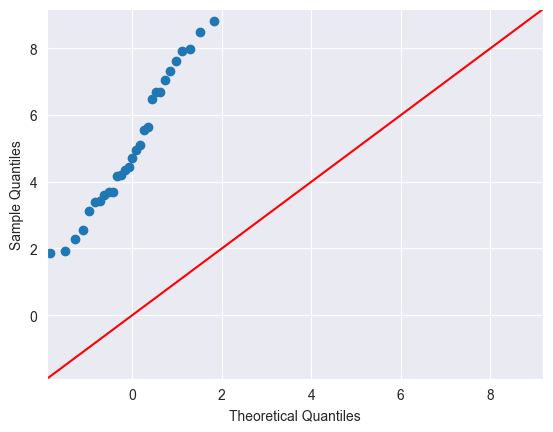

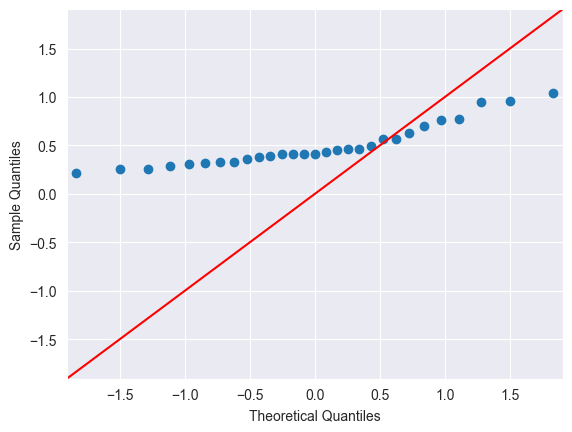

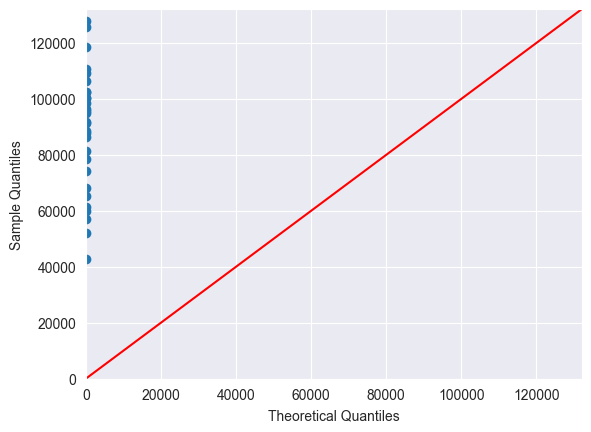

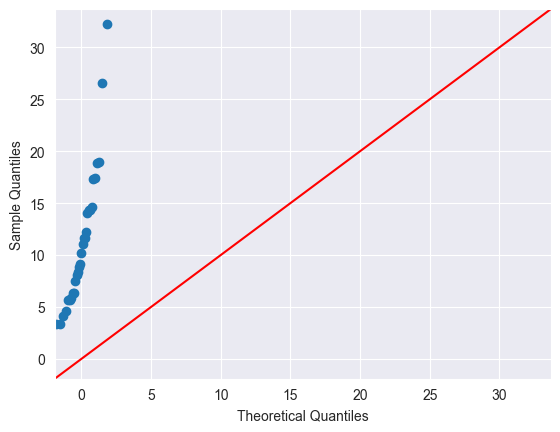

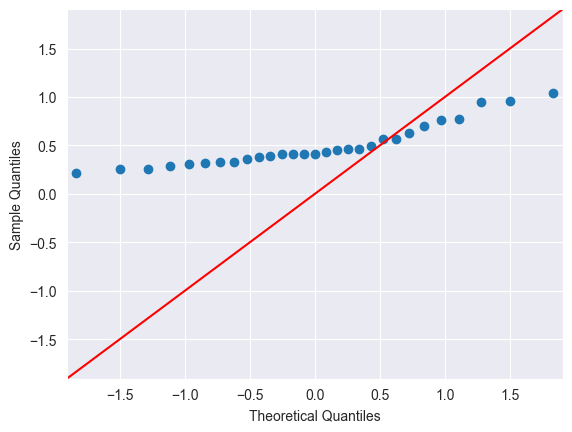

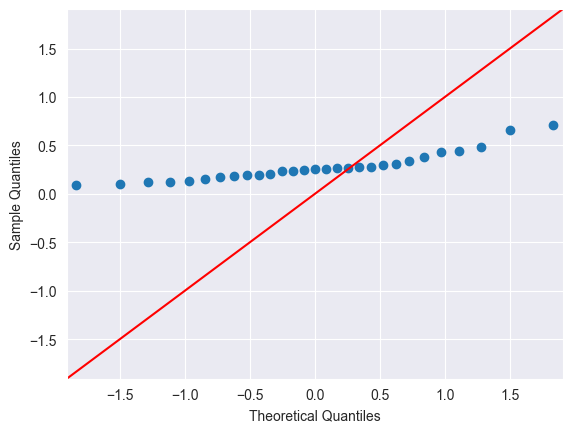

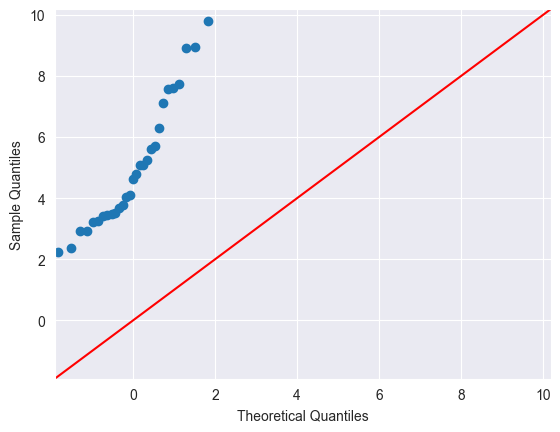

In [200]:
fig = [sm.qqplot(metrics_cg[i], line='45') for i in metrics_cg.columns[1:]]
plt.show()

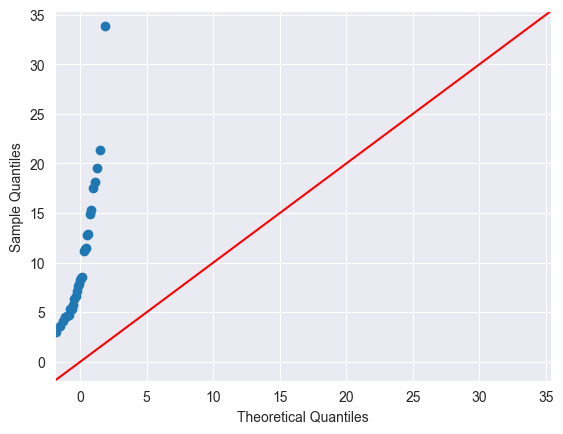

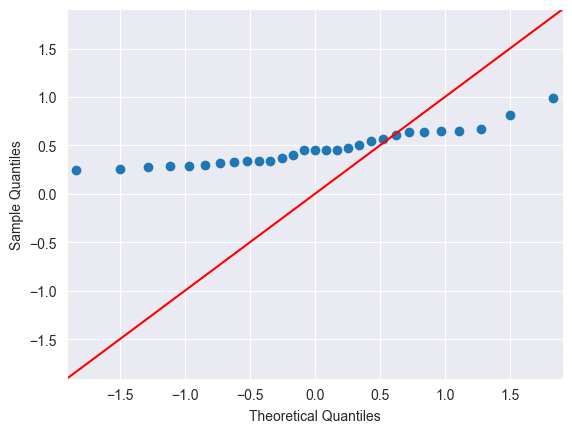

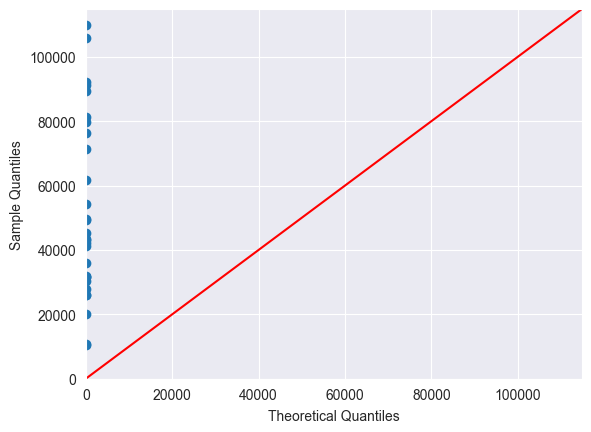

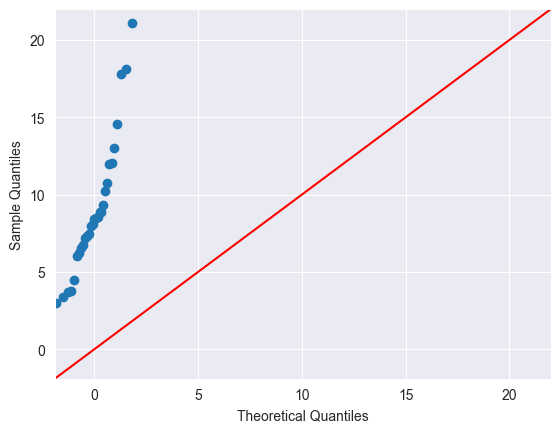

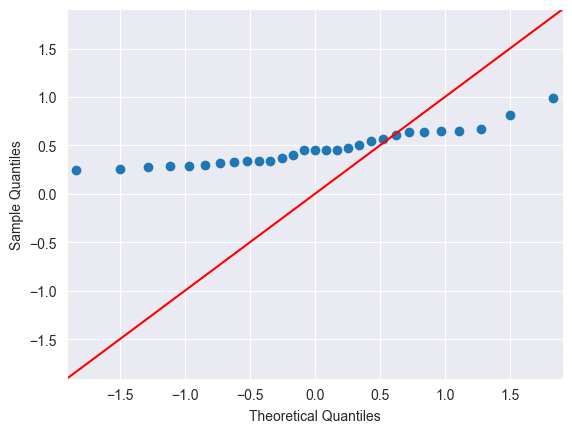

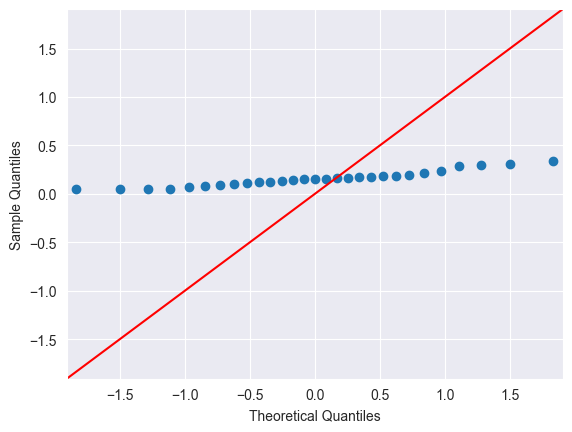

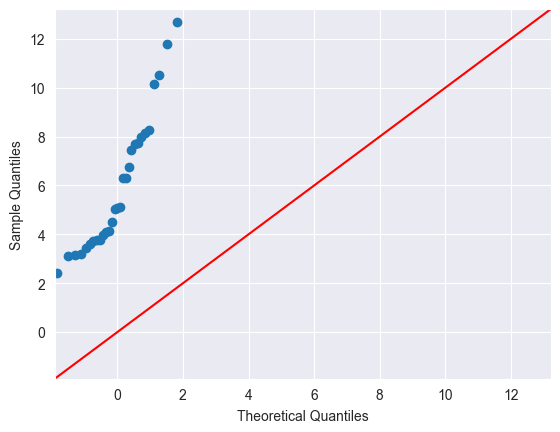

In [201]:
fig2 = [sm.qqplot(metrics_tg[i], line='45') for i in metrics_tg.columns[1:]]
plt.show()

## U-тест Манна-Уитни
### $H_0$ = {Распределения выборок равны.}
### ${H_1}$ = {Распределения выборок не равны.}
### Также тест поможет понять репрезентативность выборок. Считается, что если независимые выборки совпадают (не различаются значимо), то они являются репрезентативными.

In [265]:
for i, j in zip(metrics_cg.columns[1:], metrics_tg.columns[1:]):
    stat, p = stats.mannwhitneyu(metrics_cg[i], metrics_tg[j])
    if p > alpha:
        print(i, j, p)

CPC_cg CPC_tg 0.8641732313428653
CR_cg CR_tg 0.26284444131653684
CAC_cg CAC_tg 0.8641732313428653
CPO_cg CPO_tg 0.19678772302989056


Получившиеся выборки метрик являеются репрезентативными, поэтому мы можем использовать их для бутстрапирования.

# Bootstrap - метод получения критических значений статистики.
Идея метода: имеющаяся выборка - это единственная инфрмация об истинном распределении данных. Давайте приблизим истинное распределение эмпирическим, то есть "сами себя вытащим". Предполагается, что бутстрап-распределение окажется похожим на реальное распеделение.
Нужно, чтобы выборка была репрезентативной. Всего вариантов выборок n^n. Выход: симуляции.

Если распределение выборки несимметрично, такой доверительный интервал усиливает смещение, присущее изначальной выборке

Применим к каждой из метрик: CPC, CR, CAC, CPO метод бутстрапа.

# CPC

In [234]:
(np.median(metrics_cg['CPC_cg']), np.median(metrics_tg['CPC_tg']))

(0.41712204007285975, 0.4494203228006365)

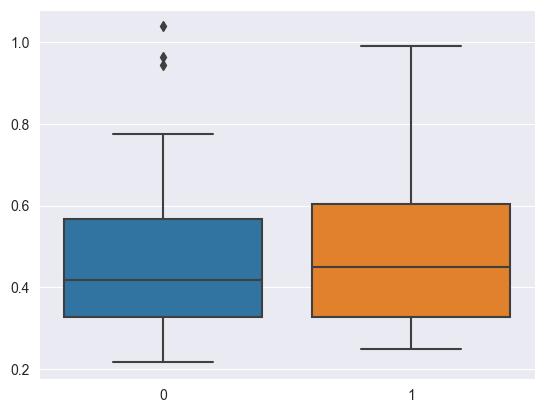

In [235]:
sns.boxplot([metrics_cg['CPC_cg'], metrics_tg['CPC_tg']]);

Проверяем гипотезу о равенстве 2 получившихся медиан с помощью бутстрепа. На гистограммах в контрольной группе наблюдаются выбросы, поэтому смотреть на среднее между двумя выборками будет некорректно, будем смотреть на медианы. Построим доверительный интервал для разности медиан.

In [236]:
def get_bootstap_sample(x, B_sample=1):
    N = x.size
    sample = np.random.choice(x, size=(N, B_sample), replace=True)

    if B_sample == 1:
        sample = sample.T[0]
    return sample

In [237]:
def stat_intervals(boot, alpha=alpha):
    left = np.quantile(boot, alpha / 2)
    right = np.quantile(boot, 1 - alpha / 2)
    return left, right

In [245]:
x_boot_cpc = get_bootstap_sample(metrics_cg['CPC_cg'], B_sample=10**5)
x_boot_cpc = np.median(x_boot_cpc, axis=0)

y_boot_cpc = get_bootstap_sample(metrics_tg['CPC_tg'], B_sample=10**5)
y_boot_cpc = np.median(y_boot_cpc, axis=0)

In [246]:
stat_intervals(x_boot_cpc)

(0.3850803244790838, 0.49892657793044226)

In [247]:
stat_intervals(y_boot_cpc)

(0.3433846153846154, 0.5458449645694653)

C:\Users\user\PycharmProjects\pythonProject3\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


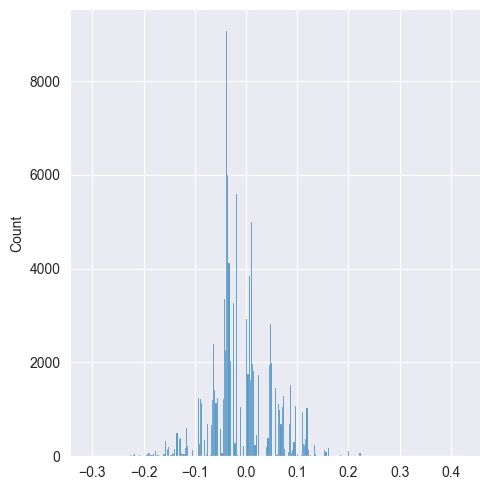

In [248]:
sns.displot(x_boot_cpc - y_boot_cpc);

In [249]:
stat_intervals(x_boot_cpc - y_boot_cpc)

(-0.13111371042215275, 0.1165660717571867)

Доверительный интервал покрывает 0, значит на уровне значимости 5% принимаем гипотезу о равенстве медиан выборок.

# CR

In [243]:
(np.median(metrics_cg['CR_cg']), np.median(metrics_tg['CR_tg']))

(10.227453475425481, 8.393680052666229)

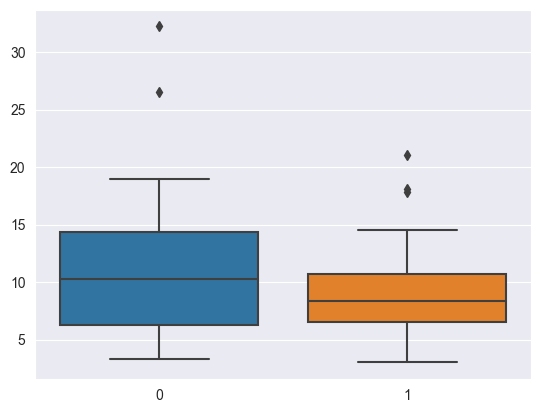

In [244]:
sns.boxplot([metrics_cg['CR_cg'], metrics_tg['CR_tg']]);

Опять же, в выборка есть выбросы, будем сравнивать медианы.

In [250]:
x_boot_cr = get_bootstap_sample(metrics_cg['CR_cg'], B_sample=10**5)
x_boot_cr = np.median(x_boot_cr, axis=0)

y_boot_cr = get_bootstap_sample(metrics_tg['CR_tg'], B_sample=10**5)
y_boot_cr = np.median(y_boot_cr, axis=0)

In [251]:
stat_intervals(x_boot_cr)

(7.4754901960784315, 14.057283429977156)

In [252]:
stat_intervals(y_boot_cr)

(7.161764705882353, 9.316525507189285)

C:\Users\user\PycharmProjects\pythonProject3\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


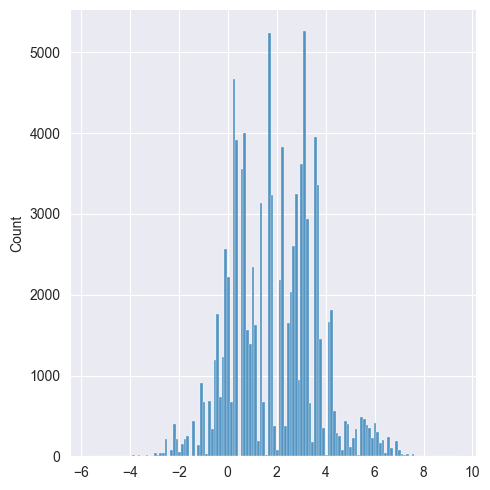

In [253]:
sns.displot(x_boot_cr - y_boot_cr);

In [254]:
stat_intervals(x_boot_cr - y_boot_cr)

(-1.1145883253109936, 5.6636033773109276)

Доверительный интервал покрывает 0. Принимаем нулевую гипотезу.

# CAC

In [255]:
(np.median(metrics_cg['CAC_cg']), np.median(metrics_tg['CAC_tg']))

(0.41712204007285975, 0.4494203228006365)

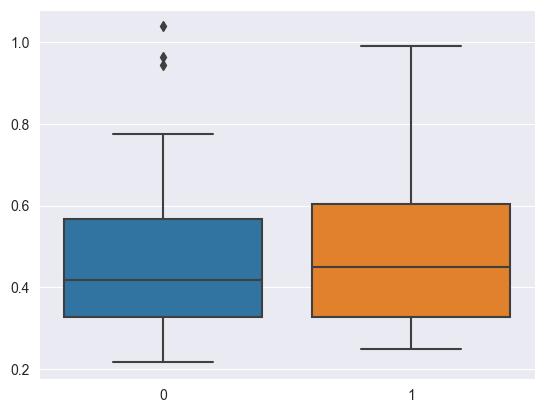

In [256]:
sns.boxplot([metrics_cg['CAC_cg'], metrics_tg['CAC_tg']]);

In [257]:
x_boot_cac = get_bootstap_sample(metrics_cg['CAC_cg'], B_sample=10**5)
x_boot_cac = np.median(x_boot_cac, axis=0)

y_boot_cac = get_bootstap_sample(metrics_tg['CAC_tg'], B_sample=10**5)
y_boot_cac = np.median(y_boot_cac, axis=0)

In [258]:
stat_intervals(x_boot_cac)

(0.3850803244790838, 0.49892657793044226)

In [259]:
stat_intervals(y_boot_cac)

(0.3433846153846154, 0.5458449645694653)

C:\Users\user\PycharmProjects\pythonProject3\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


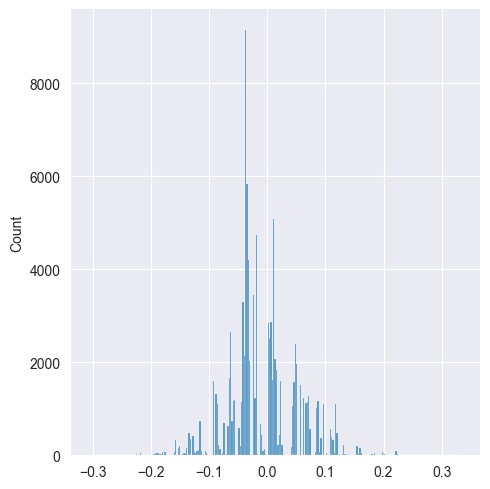

In [260]:
sns.displot(x_boot_cac - y_boot_cac);

In [261]:
stat_intervals(x_boot_cac - y_boot_cac)

(-0.12872292449660555, 0.11716464451962494)

Доверительный интервал покрывает 0. Принимаем нулевую гипотезу.

# CPO

In [266]:
(np.median(metrics_cg['CPO_cg']), np.median(metrics_tg['CPO_tg']))

(4.621004566210046, 5.088794926004228)

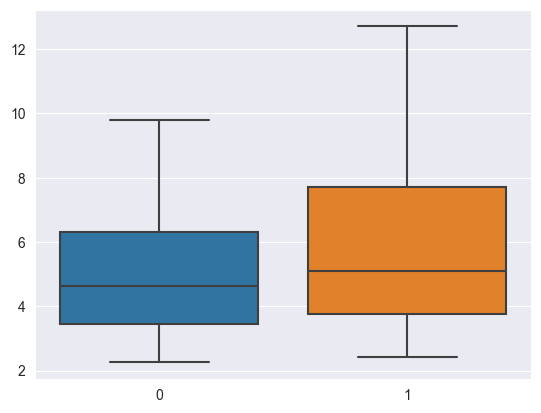

In [267]:
sns.boxplot([metrics_cg['CPO_cg'], metrics_tg['CPO_tg']]);

В данном случае нет заментых выбросов, можно сравнить группы по среднему

In [268]:
x_boot_cpo = get_bootstap_sample(metrics_cg['CPO_cg'], B_sample=10**5)
x_boot_cpo = np.mean(x_boot_cpo, axis=0)

y_boot_cpo = get_bootstap_sample(metrics_tg['CPO_tg'], B_sample=10**5)
y_boot_cpo = np.mean(y_boot_cpo, axis=0)

In [269]:
stat_intervals(x_boot_cpo)

(4.324480851595766, 5.825536372078695)

In [270]:
stat_intervals(y_boot_cpo)

(5.0348100963684175, 7.034986862439884)

C:\Users\user\PycharmProjects\pythonProject3\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


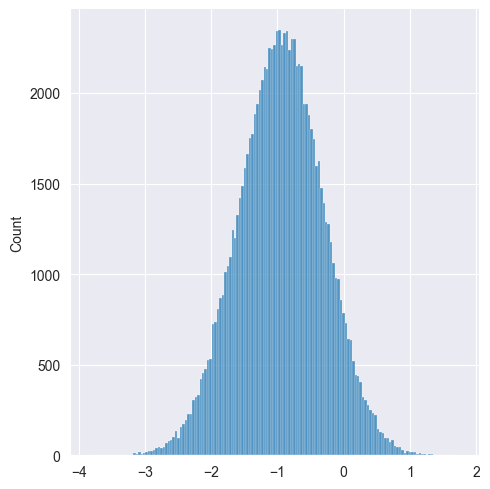

In [273]:
sns.displot(x_boot_cpo - y_boot_cpo);

In [272]:
stat_intervals(x_boot_cpo - y_boot_cpo)

(-2.2131473452373442, 0.29125798628990296)

Доверительный интервал покрывает 0. Принимаем нулевую гипотезу.

## Uplift
### В результате U-теста Манна-Уитни пройдемся по каждой метрике и найдем её uplift - оценка после изменения модели ставок (разница между средним контрольной и тестовой выборками)

In [203]:
uplift = [np.mean(CPC_cg) - np.mean(CPC_tg),
          np.mean(CR_cg) - np.mean(CR_tg),
          np.mean(CAC_cg) - np.mean(CAC_tg),
          np.mean(CPO_cg) - np.mean(CPO_tg)]
uplift

[0.023536968294100402,
 2.379397879432295,
 0.023536968294100402,
 -0.947550879475882]

CP значимо увеличился, CPO уменьшился

## Двухвыборочный критерий Стьюдента
### $H_0$ = {Средние значения выборок равны.}
### ${H_1}$ = {Средние значения выборок не равны.}

In [204]:
stats.ttest_ind(Reach_cg, Reach_tg)

TtestResult(statistic=5.556280238502353, pvalue=7.915405904037682e-07, df=56.0)

Обнаружили статистически значимые различия в среднем количестве уникальных пользователей, посмотревших рекламное объявление.